# Big Data - Project

## Data analysis

### Dragan Postolovsky
### Wojciech Taisner

This is essential part of our project, here we will try to answer for our main research question.

### What are the features that post requires to have, to gain an accepted answer?

First step in analysis will be getting some insight about features. We decided to group them into several categories:
1. Presentation features:
    * number of words in title
    * number of words in body
    * number of code snippets (code blocks)
    * number of links
2. Community reaction
    * views count
    * score
    * number of comments
    * number of answers
3. Users (posting question)
    * reputation
    * number of badges
    * number of up-votes
    * number of down-votes
    * views
4. Other
    * aggregated value of tags popularity
    * bounty for answering question
    
Our target is to try to determine, if post has an accepted answer.

## Prequesities

In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
#posts = dd.read_csv("Complete-Posts-Compressed/*.tar.xz", compression="xz")
posts = dd.read_csv("Complete-Posts/*.csv")

## Exploratory analysis

In this part we are trying to get more insight about data.

### Warning: in memory computations

In [3]:
df = posts.compute()

In [4]:
## remove outliers
df = df.loc[df["AnswerCount"]<25]
df = df.loc[df["BlocksCount"]<10]
df = df.loc[df["LinksCount"]<10]
df = df.loc[df["WordCount"]>=10]

In [5]:
df.describe()

Score     ViewCount     WordCount    LinksCount   BlocksCount  \
count  1.637714e+07  1.637714e+07  1.637714e+07  1.637714e+07  1.637714e+07   
mean   1.915958e+00  2.103527e+03  8.933313e+01  2.955714e-01  2.001040e+00   
std    2.614631e+01  1.433886e+04  6.354912e+01  7.013592e-01  1.986061e+00   
min   -1.850000e+02  1.000000e+00  1.000000e+01  0.000000e+00  0.000000e+00   
25%    0.000000e+00  7.700000e+01  4.800000e+01  0.000000e+00  1.000000e+00   
50%    0.000000e+00  2.720000e+02  7.400000e+01  0.000000e+00  1.000000e+00   
75%    1.000000e+00  9.620000e+02  1.120000e+02  0.000000e+00  3.000000e+00   
max    2.225200e+04  3.913031e+06  8.020000e+03  9.000000e+00  9.000000e+00   

       TitleWordsCount   AnswerCount  CommentCount    Reputation  \
count     1.637714e+07  1.637714e+07  1.637714e+07  1.637714e+07   
mean      8.573387e+00  1.535343e+00  1.968946e+00  2.434746e+03   
std       3.599200e+00  1.365582e+00  2.662061e+00  1.176892e+04   
min       1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%       6.000000e+00  1.000000e+00  0.000000e+00  2.500000e+01   
50%       8.000000e+00  1.000000e+00  1.000000e+00  1.770000e+02   
75%       1.100000e+01  2.000000e+00  3.000000e+00  1.204000e+03   
max       4.500000e+01  2.400000e+01  1.090000e+02  1.070456e+06   

              Views       UpVotes     DownVotes   BadgesCount  tagsAggregate  
count  1.637714e+07  1.637714e+07  1.637714e+07  1.637714e+07   1.637714e+07  
mean   3.535047e+02  2.525683e+02  2.539590e+01  5.556092e+01   9.489383e+05  
std    3.004698e+03  8.463325e+02  3.654506e+02  1.268838e+02   8.478641e+05  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
25%    1.000000e+01  0.000000e+00  0.000000e+00  6.000000e+00   1.691010e+05  
50%    4.600000e+01  2.100000e+01  0.000000e+00  1.600000e+01   8.842470e+05  
75%    2.080000e+02  1.550000e+02  5.000000e+00  5.200000e+01   1.487235e+06  
max    1.723431e+06  9.054900e+04  6.550000e+04  1.689900e+04   6.680300e+06

In [6]:
df.corr()

Score  ViewCount  WordCount  LinksCount  BlocksCount  \
Score            1.000000   0.476777  -0.000002    0.006296     0.002447   
ViewCount        0.476777   1.000000  -0.020484   -0.006048    -0.005119   
WordCount       -0.000002  -0.020484   1.000000    0.185857     0.140834   
LinksCount       0.006296  -0.006048   0.185857    1.000000     0.026998   
BlocksCount      0.002447  -0.005119   0.140834    0.026998     1.000000   
TitleWordsCount -0.000741  -0.007633   0.081902    0.012600    -0.005385   
AnswerCount      0.181913   0.347398  -0.039453   -0.045726    -0.000573   
CommentCount     0.007707  -0.000629   0.060917    0.014179     0.105704   
bounty           0.038342   0.015889   0.071793    0.067357     0.031042   
Reputation       0.068521   0.057827   0.019978    0.037281     0.043740   
Views            0.038275   0.028091   0.009975    0.023301     0.024578   
UpVotes          0.043259   0.038868   0.018602    0.063943     0.073977   
DownVotes        0.013407   0.011465   0.014690    0.021990     0.030831   
BadgesCount      0.053578   0.075228  -0.009378    0.030898     0.045580   
tagsAggregate   -0.005375   0.003521   0.001290    0.011758     0.082265   
isAnswered       0.035687   0.067442  -0.016547   -0.009090     0.072857   

                 TitleWordsCount  AnswerCount  CommentCount    bounty  \
Score                  -0.000741     0.181913      0.007707  0.038342   
ViewCount              -0.007633     0.347398     -0.000629  0.015889   
WordCount               0.081902    -0.039453      0.060917  0.071793   
LinksCount              0.012600    -0.045726      0.014179  0.067357   
BlocksCount            -0.005385    -0.000573      0.105704  0.031042   
TitleWordsCount         1.000000    -0.017328     -0.004293  0.006914   
AnswerCount            -0.017328     1.000000     -0.005944  0.071896   
CommentCount           -0.004293    -0.005944      1.000000  0.051246   
bounty                  0.006914     0.071896      0.051246  1.000000   
Reputation              0.008297     0.104213     -0.010906  0.042875   
Views                   0.007362     0.052640      0.001222  0.026569   
UpVotes                 0.015812     0.085601     -0.005294  0.055338   
DownVotes              -0.001060     0.024226      0.006978  0.022372   
BadgesCount             0.010563     0.143755     -0.028965  0.062060   
tagsAggregate           0.003234     0.075979      0.123742 -0.009995   
isAnswered             -0.015923     0.269733     -0.073087  0.009224   

                 Reputation     Views   UpVotes  DownVotes  BadgesCount  \
Score              0.068521  0.038275  0.043259   0.013407     0.053578   
ViewCount          0.057827  0.028091  0.038868   0.011465     0.075228   
WordCount          0.019978  0.009975  0.018602   0.014690    -0.009378   
LinksCount         0.037281  0.023301  0.063943   0.021990     0.030898   
BlocksCount        0.043740  0.024578  0.073977   0.030831     0.045580   
TitleWordsCount    0.008297  0.007362  0.015812  -0.001060     0.010563   
AnswerCount        0.104213  0.052640  0.085601   0.024226     0.143755   
CommentCount      -0.010906  0.001222 -0.005294   0.006978    -0.028965   
bounty             0.042875  0.026569  0.055338   0.022372     0.062060   
Reputation         1.000000  0.592574  0.544130   0.357743     0.692235   
Views              0.592574  1.000000  0.330167   0.301461     0.520452   
UpVotes            0.544130  0.330167  1.000000   0.278281     0.560609   
DownVotes          0.357743  0.301461  0.278281   1.000000     0.196082   
BadgesCount        0.692235  0.520452  0.560609   0.196082     1.000000   
tagsAggregate     -0.019669 -0.005852 -0.018778  -0.002915    -0.009939   
isAnswered         0.087289  0.046437  0.123632   0.032628     0.146844   

                 tagsAggregate  isAnswered  
Score                -0.005375    0.035687  
ViewCount             0.003521    0.067442  
WordCount             0.001290   -0.016547  
LinksCount            0.01175

# Simple plots

Plotting each feature over target.

NOTE: most of plots in the notebook are plots of 10k subset of corresponding dataset.

Score


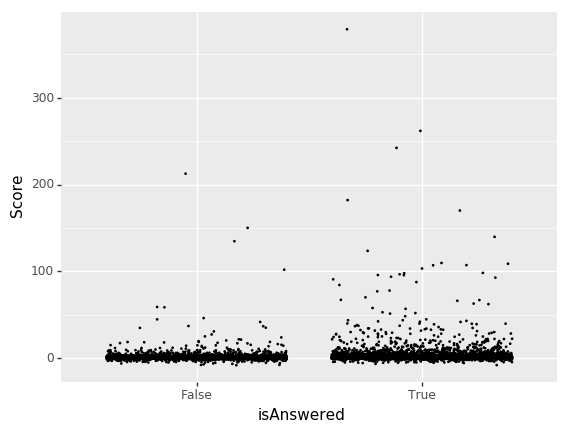

<ggplot: (8772705780751)>
ViewCount


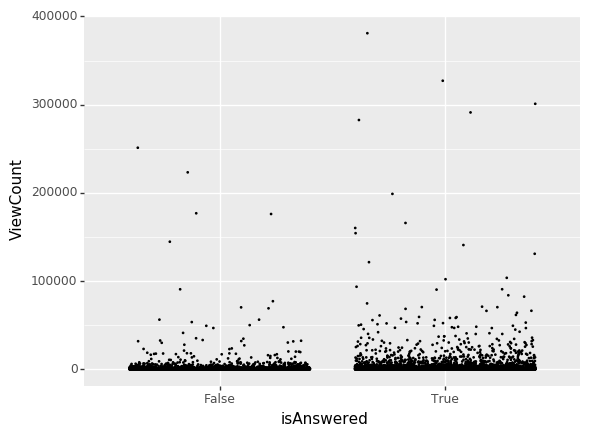

<ggplot: (8772705780821)>
WordCount


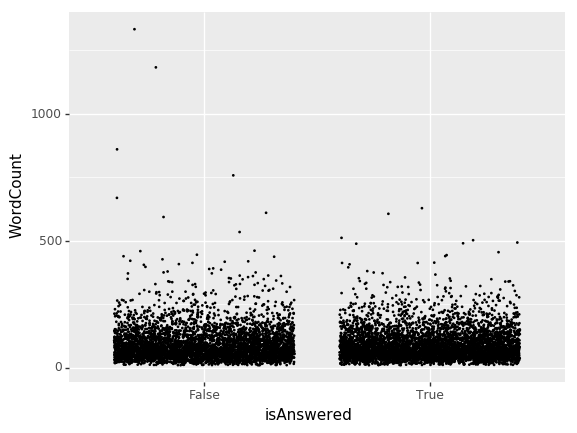

<ggplot: (-9223363264148995061)>
LinksCount


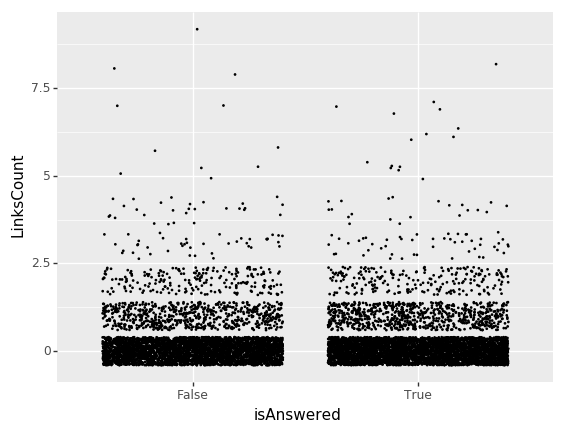

<ggplot: (-9223363264148994914)>
BlocksCount


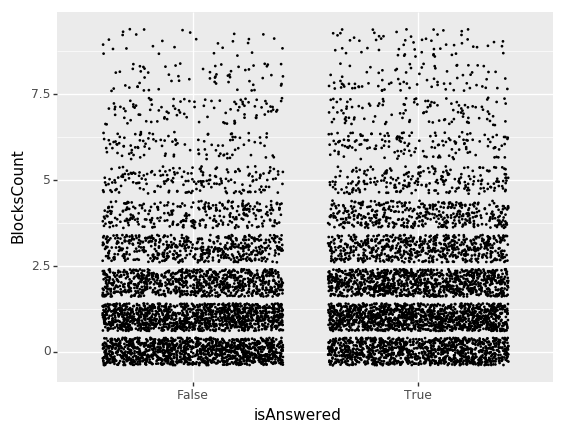

<ggplot: (-9223363264414465960)>
TitleWordsCount


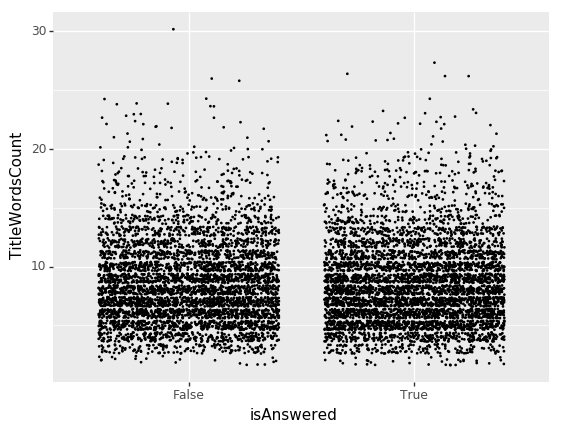

<ggplot: (-9223363264404402986)>
AnswerCount


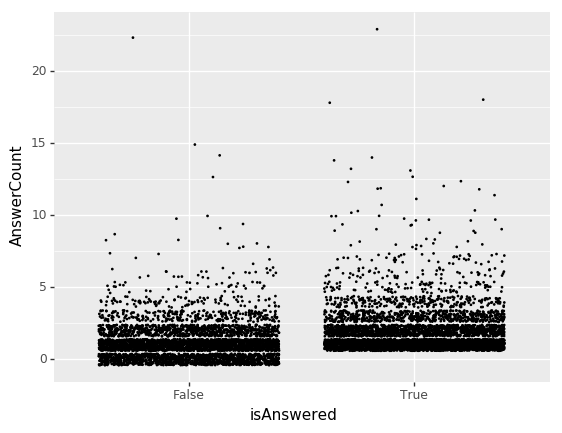

<ggplot: (-9223363264182331192)>
CommentCount


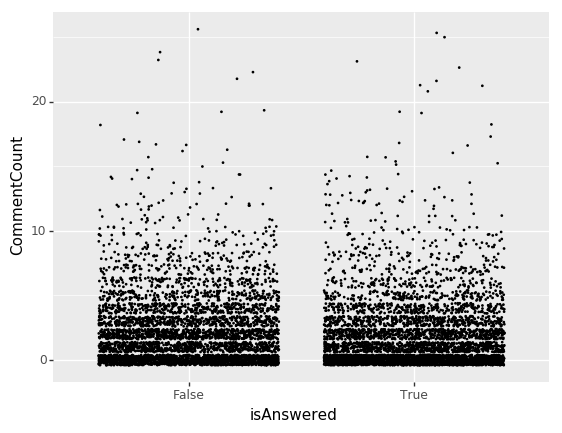

<ggplot: (8772672494712)>
bounty


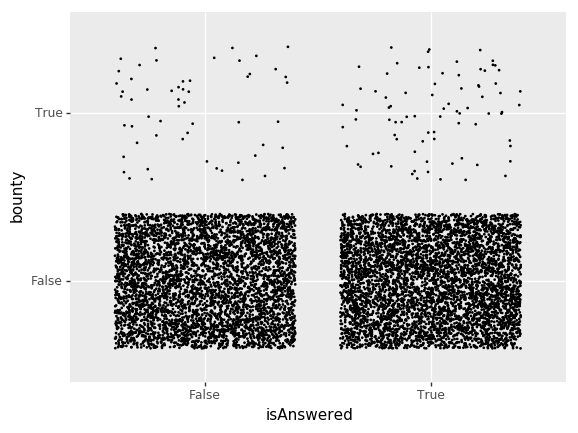

<ggplot: (8772672306219)>
Reputation


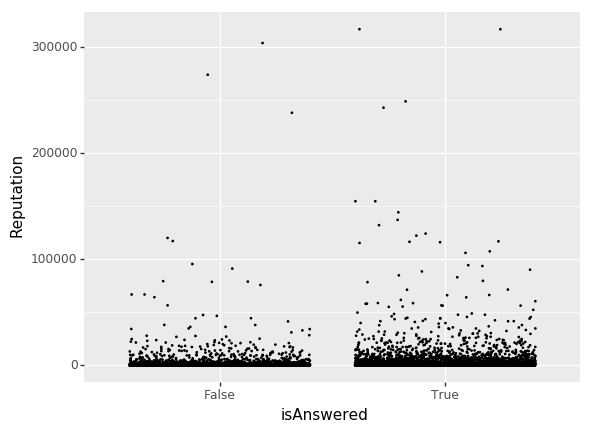

<ggplot: (8772672219284)>
Views


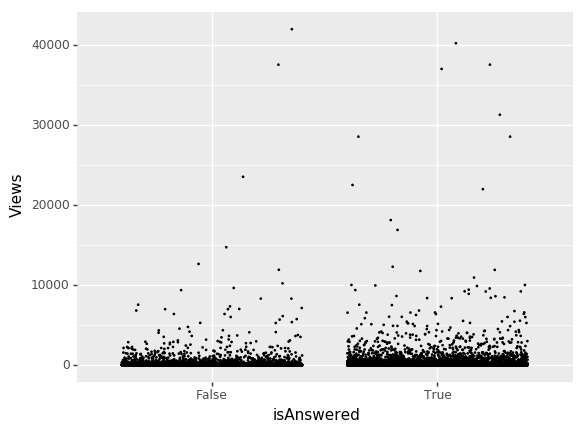

<ggplot: (8772672223296)>
UpVotes


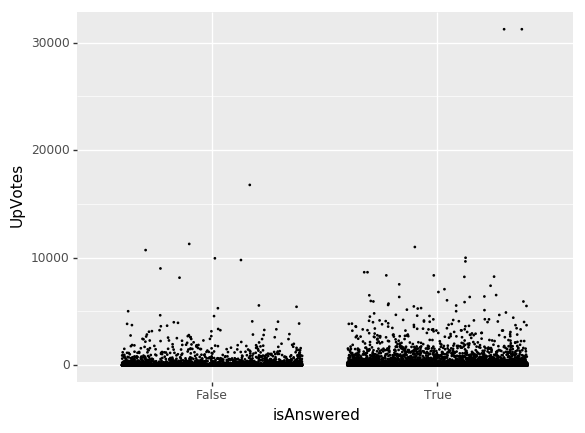

<ggplot: (8772672159766)>
DownVotes


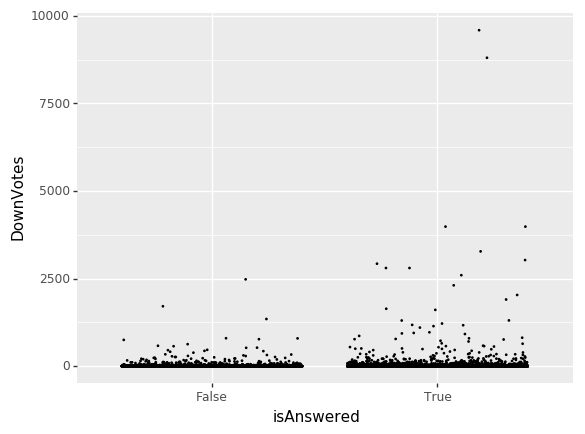

<ggplot: (8772649874927)>
BadgesCount


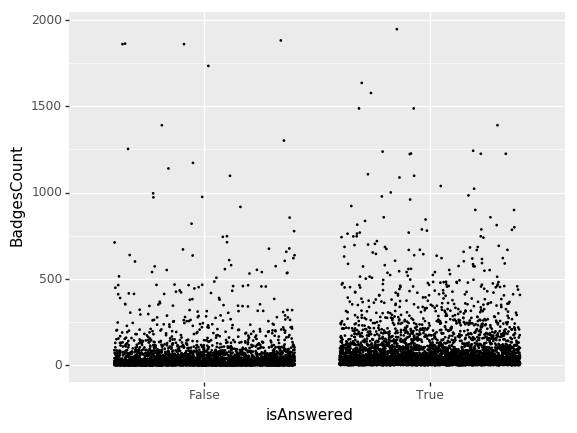

<ggplot: (8772705655735)>
tagsAggregate


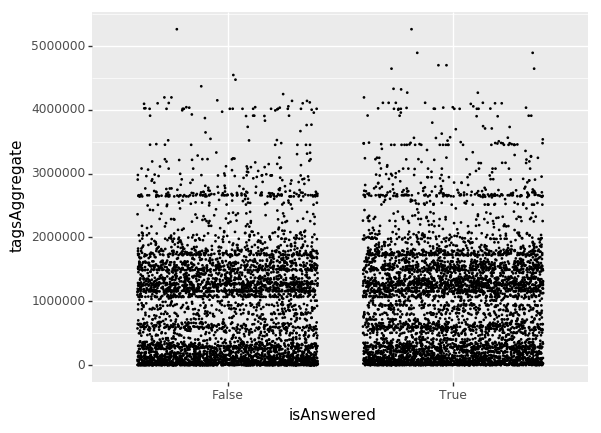

<ggplot: (-9223363264149092380)>


In [7]:
# plot random sample of 10000 points 
temp_df = df.sample(n=10000)
for column in df:
    if column != "isAnswered":
        print(column)
        plot = ggplot(temp_df, aes(x="isAnswered", y=column))
        plot += geom_jitter(size=0.1)
        print(plot)

Simple analysis does not reveal much information about the data. Only one conclusion we can have, is that posts with 0 answers does not have accepted answer, which is rather obvious. We will continue with more precise analysis.

# More plots

First, the balance of the dataset, we will check how common are answered questions.

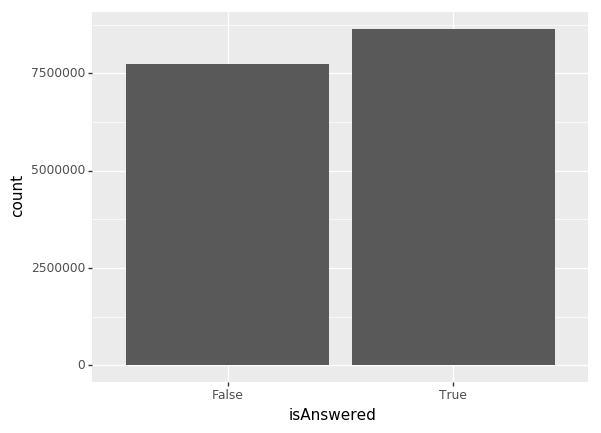

<ggplot: (8772705780954)>

In [8]:
#do not re-run this
plot = ggplot(df, aes(x="isAnswered"))
plot += geom_bar()
plot

In [9]:
# proportion of answered questions
sum(df["isAnswered"])/df.count()["isAnswered"]

0.5268940763642586

As we can see, our dataset is perfectly balanced, as it should be.

## Presentation features

Here we will try to get some more insight about this group of features.
Below, there is a closer look for Word Count and Blocks Count (Code snippets).

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 12 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


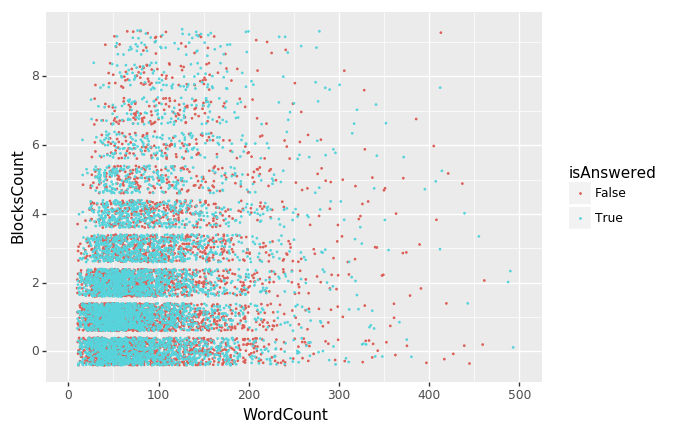

<ggplot: (8772649904157)>

In [10]:
plot = ggplot(temp_df, aes(x="WordCount", y="BlocksCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot += scale_y_continuous(breaks=range(0,12,2))
plot += xlim(0,500) # reduce outliers impact
plot

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 2155 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


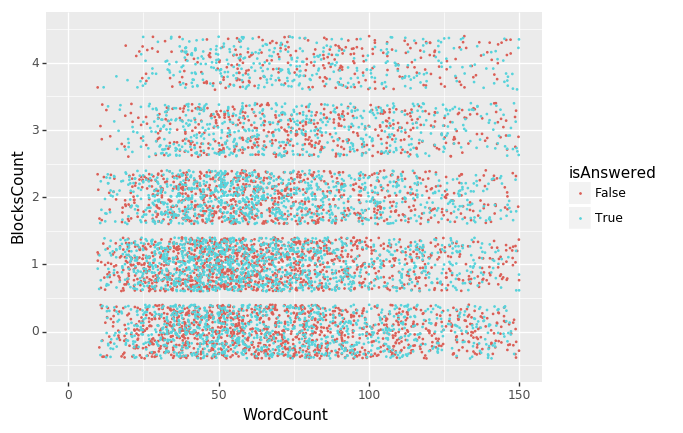

<ggplot: (-9223363264204871494)>

In [11]:
plot = ggplot(temp_df, aes(x="WordCount", y="BlocksCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
#plot += scale_y_continuous(breaks=range(0,12,2))
plot += xlim(0,150) #zoom
plot += ylim(-0.5,4.5) #zoom
plot

### Conclusions

1. There is no significant linear relationship between any of presentation features and Accepted Answers
2. Presentations features contains mostly of text analysis - and this is unfortunately very basic. Maybe more meaningful text analysis would be able to result in better outcome.
3. Most of posts are rather small, no more than 150 words, almost 0 links and about 2 code snippets at average. Unfortunately zooming this group does not reveal more information.

## Community reaction features

In this section, we want to measure community reactions over posts.

### 1. Score and view count

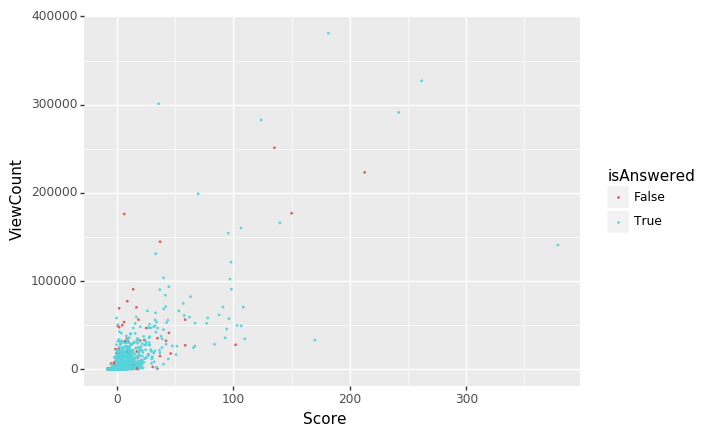

<ggplot: (8772649904304)>

In [12]:
plot = ggplot(temp_df, aes(x="Score", y="ViewCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
#plot += scale_y_log10()
plot

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 517 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


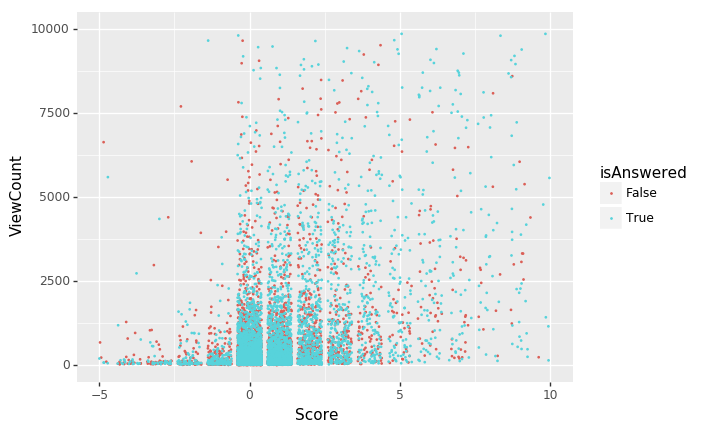

<ggplot: (8772649399360)>

In [13]:
plot = ggplot(temp_df, aes(x="Score", y="ViewCount", color="isAnswered"))
plot += xlim(-5,10)
plot += ylim(0,10000)
#plot += scale_y_log10()
plot += geom_jitter(size=0.1)
plot

### 2. Answers Count

With some extensions

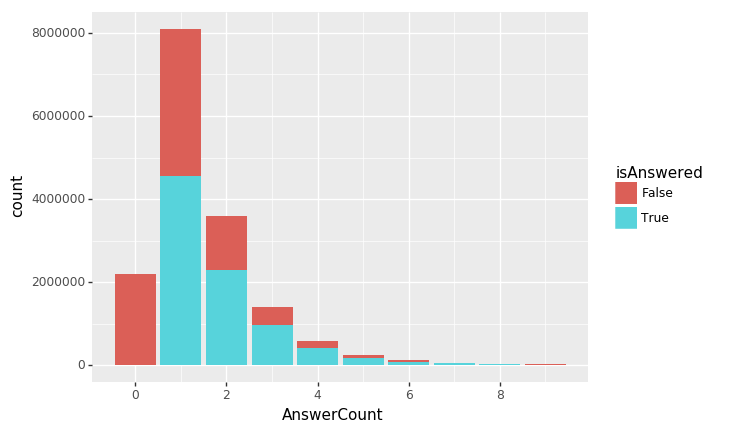

<ggplot: (8772649527560)>

In [14]:
#do not re-run this
plot = ggplot(df.loc[df["AnswerCount"]<10], aes(x="AnswerCount", fill="isAnswered"))
plot += geom_bar()
plot += scale_x_continuous(breaks=range(0,10,2))
plot

In [15]:
# caluclate percentage of posts with 0 answers
sum(df["AnswerCount"]==0)/df.count()["AnswerCount"]

0.13421343826986132

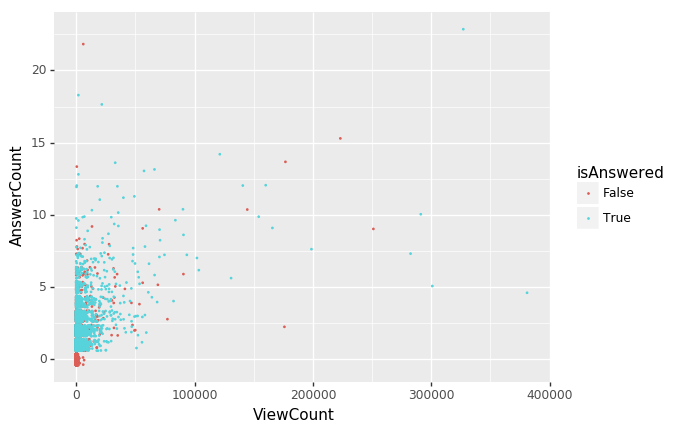

<ggplot: (8772710019069)>

In [16]:
plot = ggplot(temp_df, aes(x="ViewCount", y="AnswerCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 2515 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


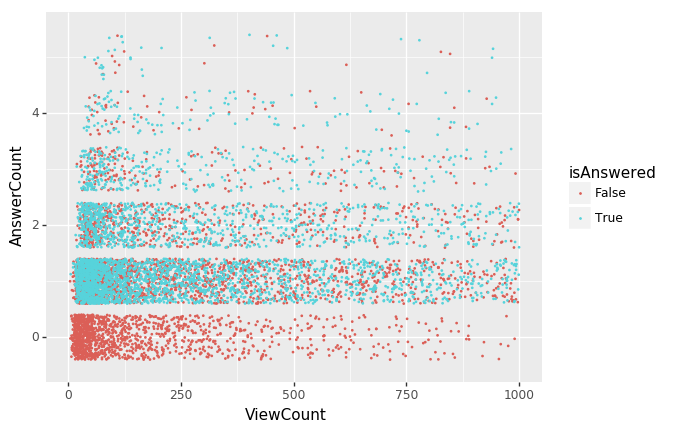

<ggplot: (8772649519585)>

In [17]:
plot = ggplot(temp_df, aes(x="ViewCount", y="AnswerCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot += ylim(-0.5, 5.5)
plot += xlim(0,1000)
plot

### Conclusions
1. Most of posts does not exceed 1000 views and score 4 (and almost half of post does not exceed 270 views)
2. More than 13% of posts is still not answered
3. There might be relationship between number of answers and proportion of accepted and not accepted answers for questions within this number
4. Most of answers is rather unpopular or ignored in terms of views and scores.

## Users Features

How data about author of posts affects presence of accepted answer and it's popularity over community?

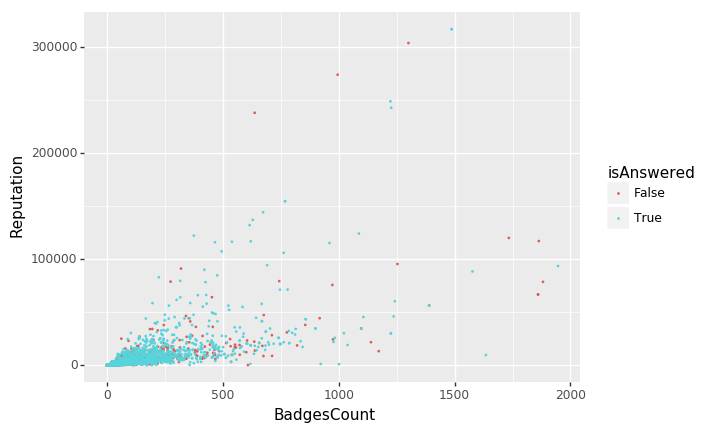

<ggplot: (8772649518365)>

In [18]:
plot = ggplot(temp_df, aes(x="BadgesCount", y="Reputation", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 2949 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


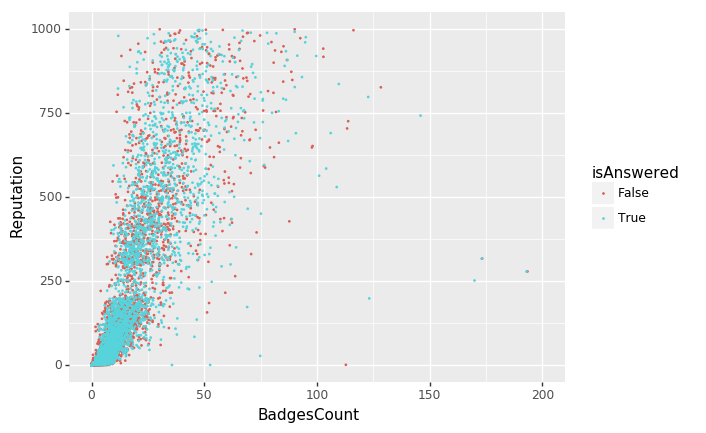

<ggplot: (8772648950399)>

In [19]:
plot = ggplot(temp_df, aes(x="BadgesCount", y="Reputation", color="isAnswered"))
plot += xlim(0,200)
plot += ylim(0,1000)
plot += geom_jitter(size=0.1)
plot

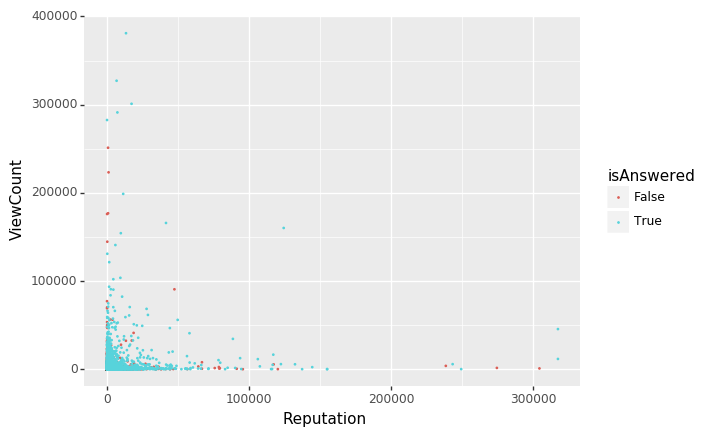

<ggplot: (8772649296206)>

In [20]:
plot = ggplot(temp_df, aes(x="Reputation", y="ViewCount", color="isAnswered"))
#plot += xlim(-0.5,10.5)
#plot += ylim(0,200)
plot += geom_jitter(size=0.1)
plot

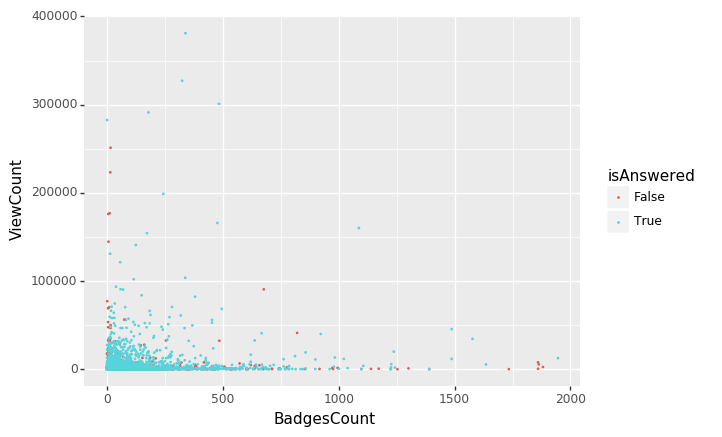

<ggplot: (-9223363264205859619)>

In [21]:
plot = ggplot(temp_df, aes(x="BadgesCount", y="ViewCount", color="isAnswered"))
#plot += xlim(-0.5,10.5)
#plot += ylim(0,200)
plot += geom_jitter(size=0.1)
plot

### Conclusions
1. Badges and reputation does not affect popularity of question (number of views) - in fact trend is opposite, popular questions were asked by users with rather little badges and reputation
2. Moreover, badges and reputation does not help to determine, if question has an accepted answer in general but we can observe that for users with very high reputation and number of badges, questions are answered (but number is still rather insignificant)

## Other

Does aggregated popularity of tags affect popularity of question?

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 2482 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


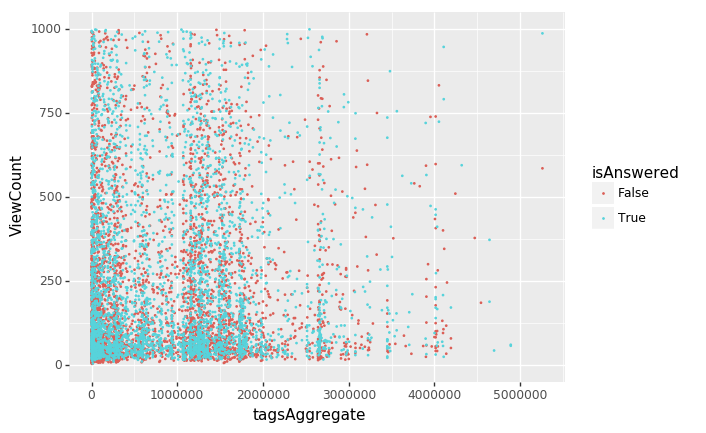

<ggplot: (-9223363264205860450)>

In [22]:
plot = ggplot(temp_df, aes(x="tagsAggregate", y="ViewCount", color="isAnswered"))
plot += ylim(0,1000)
plot += geom_jitter(size=0.1)
plot

Aggregated tags popularity seems to have little impact on popularity of questions. Perhaps this feature should be re-defined.

# Preliminary conclusions for exploratory data analysis
1. Problem is very complex, there are no features strongly correlated with target
2. Presentation provided presentation features are almost useless - more advanced text analysis should be performed
3. Community engagement is inconclusive, it may be helpful to find if question is "popular"
4. Most of questions are very similar in terms of presentation(most of posts rather short), popularity (most of posts can be considered as ignored) and users (most of users has rather low reputation and little badges)

## Possible solutions
1. Splitting datasets by some factor e.g. ignored and not ignored posts
2. Re-defining target criteria (maybe some users does not mark if answer was accepted or not
3. Adding more features, e.g. advanced text processing

# Analysing solution 1: 
# Splitting datasets by factors

From the previous investigations, it is safe to say that quite a sizeable amount of posted questions get ignored. That is to say, their view count and their score respectively are rarely above some insignificant threshold.
This obstructs the results of our investigation, since it is not possible to get any relevant information from those posts at all.

To correct this, the section ahead applies threshold limits to some features of the posts, with the hopes of getting clearer results, from data that is more relevant.

### Splitting posts for ignored and not ignored

For starters, we decided to remove all posts whose score is less than four, and whose view count is less than 50.
These are after all somewhat average numbers for a post that gets no attention whatsoever.

In [23]:
sum(df["Score"]>=4)

1669654

In [24]:
sum(df["ViewCount"]>=50)

13920604

In [25]:
Score_treshold = 4

# Ignored posts
There is still some minor relevance to these posts, so in the next couple of blocks we graphically show some relations between features of posts which we specifically mark as 'ignored'.

In [26]:
# check ignored posts
ignored = df.loc[df["Score"]<Score_treshold]
#ignored = ignored.loc[ignored["ViewCount"]<50]

In [27]:
ignored.describe()

Score     ViewCount     WordCount    LinksCount   BlocksCount  \
count  1.470748e+07  1.470748e+07  1.470748e+07  1.470748e+07  1.470748e+07   
mean   4.805651e-01  7.777151e+02  8.856962e+01  2.865060e-01  1.992836e+00   
std    1.152576e+00  2.013897e+03  6.190135e+01  6.824269e-01  1.964758e+00   
min   -1.850000e+02  1.000000e+00  1.000000e+01  0.000000e+00  0.000000e+00   
25%    0.000000e+00  6.900000e+01  4.900000e+01  0.000000e+00  1.000000e+00   
50%    0.000000e+00  2.170000e+02  7.300000e+01  0.000000e+00  1.000000e+00   
75%    1.000000e+00  7.000000e+02  1.110000e+02  0.000000e+00  3.000000e+00   
max    3.000000e+00  2.744710e+05  8.020000e+03  9.000000e+00  9.000000e+00   

       TitleWordsCount   AnswerCount  CommentCount    Reputation  \
count     1.470748e+07  1.470748e+07  1.470748e+07  1.470748e+07   
mean      8.583355e+00  1.377666e+00  1.965268e+00  1.911000e+03   
std       3.616915e+00  1.064809e+00  2.638054e+00  9.072476e+03   
min       1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%       6.000000e+00  1.000000e+00  0.000000e+00  2.000000e+01   
50%       8.000000e+00  1.000000e+00  1.000000e+00  1.410000e+02   
75%       1.100000e+01  2.000000e+00  3.000000e+00  9.730000e+02   
max       4.500000e+01  2.400000e+01  1.090000e+02  8.297540e+05   

              Views       UpVotes     DownVotes   BadgesCount  tagsAggregate  
count  1.470748e+07  1.470748e+07  1.470748e+07  1.470748e+07   1.470748e+07  
mean   2.894326e+02  2.190905e+02  2.074371e+01  4.918260e+01   9.580359e+05  
std    1.445784e+03  7.528329e+02  3.077116e+02  1.118174e+02   8.568554e+05  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
25%    9.000000e+00  0.000000e+00  0.000000e+00  5.000000e+00   1.712220e+05  
50%    4.000000e+01  1.700000e+01  0.000000e+00  1.400000e+01   9.050065e+05  
75%    1.780000e+02  1.300000e+02  4.000000e+00  4.600000e+01   1.487419e+06  
max    4.313370e+05  9.054900e+04  6.550000e+04  5.975000e+03   6.680300e+06

In [28]:
ignored.corr()

Score  ViewCount  WordCount  LinksCount  BlocksCount  \
Score            1.000000   0.194704   0.091039    0.041972     0.055725   
ViewCount        0.194704   1.000000   0.002840   -0.012572    -0.010772   
WordCount        0.091039   0.002840   1.000000    0.170993     0.137929   
LinksCount       0.041972  -0.012572   0.170993    1.000000     0.020160   
BlocksCount      0.055725  -0.010772   0.137929    0.020160     1.000000   
TitleWordsCount -0.002957  -0.017758   0.081729    0.011111    -0.007107   
AnswerCount      0.081687   0.227909  -0.058795   -0.067319     0.016320   
CommentCount    -0.098696  -0.019817   0.048888    0.004535     0.103959   
bounty           0.069867   0.013756   0.042067    0.036212     0.017883   
Reputation       0.079054   0.031159   0.014472    0.028616     0.044944   
Views            0.056944   0.028813   0.005883    0.027043     0.040045   
UpVotes          0.081957   0.027678   0.014781    0.055503     0.075747   
DownVotes        0.019886   0.006093   0.012342    0.017632     0.030418   
BadgesCount      0.099955   0.068469  -0.012502    0.023066     0.049834   
tagsAggregate   -0.056657   0.005319   0.001853    0.012427     0.084747   
isAnswered       0.102233   0.095004  -0.016320   -0.011109     0.076431   

                 TitleWordsCount  AnswerCount  CommentCount    bounty  \
Score                  -0.002957     0.081687     -0.098696  0.069867   
ViewCount              -0.017758     0.227909     -0.019817  0.013756   
WordCount               0.081729    -0.058795      0.048888  0.042067   
LinksCount              0.011111    -0.067319      0.004535  0.036212   
BlocksCount            -0.007107     0.016320      0.103959  0.017883   
TitleWordsCount         1.000000    -0.018666     -0.006190  0.003473   
AnswerCount            -0.018666     1.000000     -0.027884  0.035788   
CommentCount           -0.006190    -0.027884      1.000000  0.021439   
bounty                  0.003473     0.035788      0.021439  1.000000   
Reputation              0.008883     0.058506     -0.023681  0.029436   
Views                   0.011479     0.051698     -0.011511  0.030430   
UpVotes                 0.015426     0.051273     -0.013878  0.041649   
DownVotes              -0.001692     0.014357      0.001892  0.014260   
BadgesCount             0.010365     0.100494     -0.037853  0.048810   
tagsAggregate           0.004119     0.106925      0.126702 -0.013198   
isAnswered             -0.015527     0.294077     -0.073870  0.014261   

                 Reputation     Views   UpVotes  DownVotes  BadgesCount  \
Score              0.079054  0.056944  0.081957   0.019886     0.099955   
ViewCount          0.031159  0.028813  0.027678   0.006093     0.068469   
WordCount          0.014472  0.005883  0.014781   0.012342    -0.012502   
LinksCount         0.028616  0.027043  0.055503   0.017632     0.023066   
BlocksCount        0.044944  0.040045  0.075747   0.030418     0.049834   
TitleWordsCount    0.008883  0.011479  0.015426  -0.001692     0.010365   
AnswerCount        0.058506  0.051698  0.051273   0.014357     0.100494   
CommentCount      -0.023681 -0.011511 -0.013878   0.001892    -0.037853   
bounty             0.029436  0.030430  0.041649   0.014260     0.048810   
Reputation         1.000000  0.784552  0.531946   0.354670     0.673495   
Views              0.784552  1.000000  0.502574   0.429089     0.626802   
UpVotes            0.531946  0.502574  1.000000   0.270132     0.553789   
DownVotes          0.354670  0.429089  0.270132   1.000000     0.180233   
BadgesCount        0.673495  0.626802  0.553789   0.180233     1.000000   
tagsAggregate     -0.020174 -0.008525 -0.017113  -0.002452    -0.008320   
isAnswered         0.080564  0.071788  0.114963   0.030662     0.138499   

                 tagsAggregate  isAnswered  
Score                -0.056657    0.102233  
ViewCount             0.005319    0.095004  
WordCount             0.001853   -0.016320  
LinksCount            0.01242

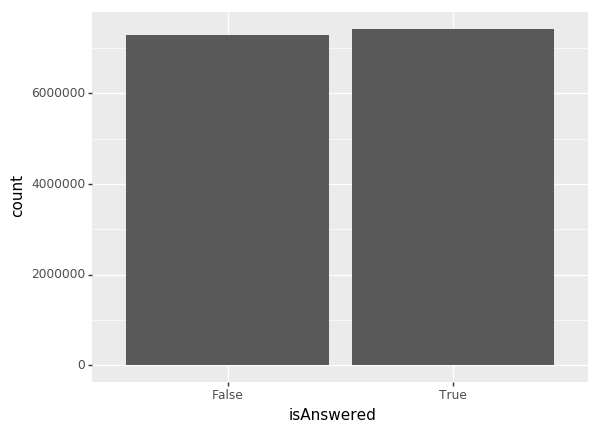

<ggplot: (8772649516103)>

In [29]:
#do not re-run this
plot = ggplot(ignored, aes(x="isAnswered"))
plot += geom_bar()
plot

In [30]:
# how many ignored posts has 0 answers (proportion)
sum(ignored["AnswerCount"]==0)/ignored.shape[0]

0.14676521150728433

In [31]:
sum(ignored["AnswerCount"]==0)

2158547

In [32]:
# proportion of is Answered and number of answers = 0 to total is answered = 0
sum((ignored.loc[ignored["AnswerCount"]==0])["isAnswered"]==0)/sum(ignored["isAnswered"]==0)

0.2958856412801202

Score


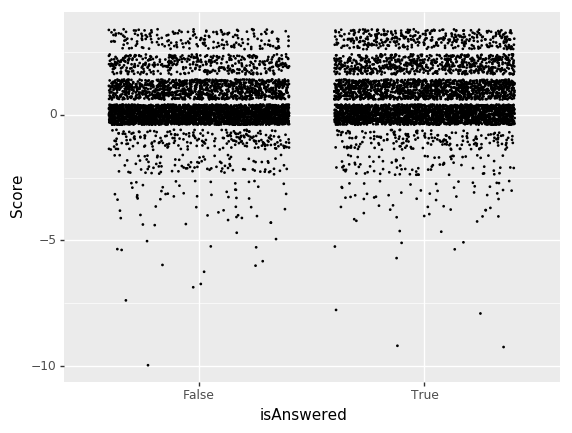

<ggplot: (8772649472253)>
ViewCount


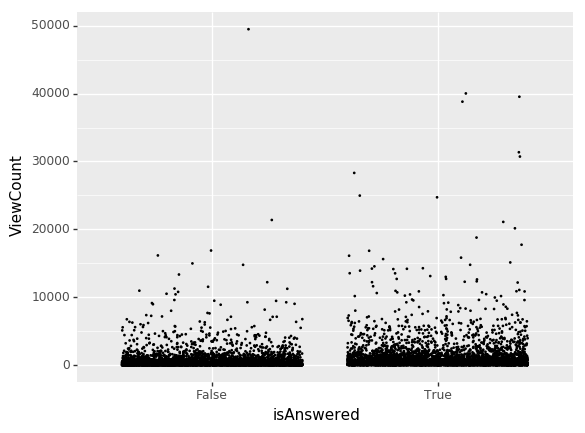

<ggplot: (-9223363264204809412)>
WordCount


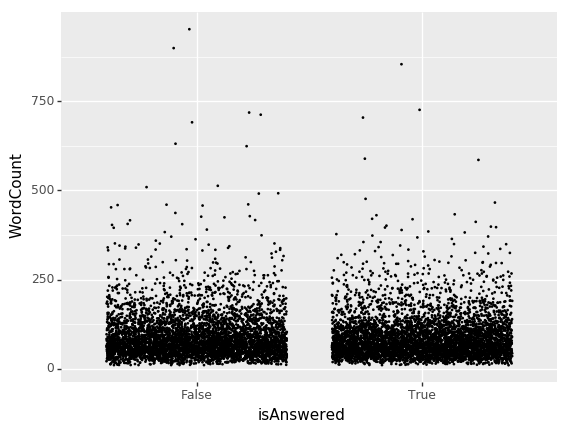

<ggplot: (-9223363264205304004)>
LinksCount


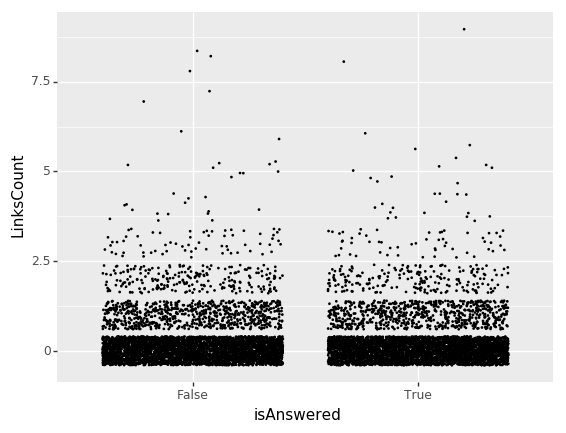

<ggplot: (-9223363264204809384)>
BlocksCount


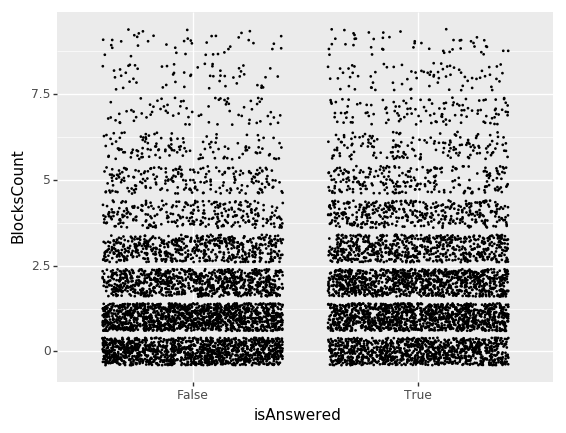

<ggplot: (8772649471752)>
TitleWordsCount


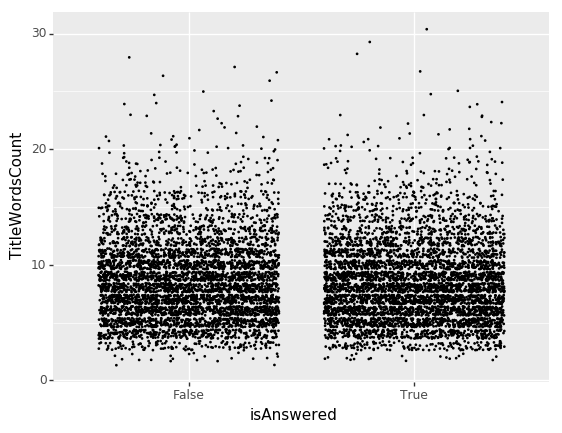

<ggplot: (8772649505151)>
AnswerCount


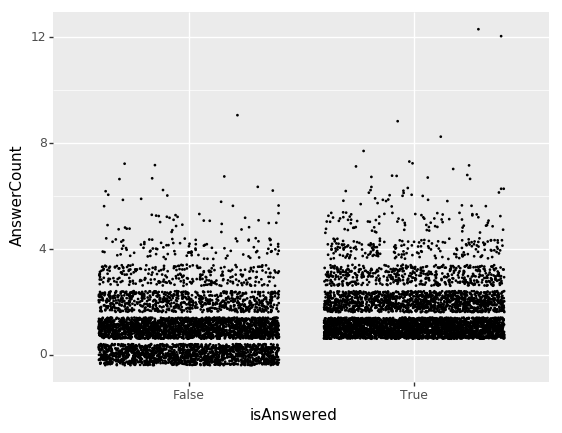

<ggplot: (-9223363264205275213)>
CommentCount


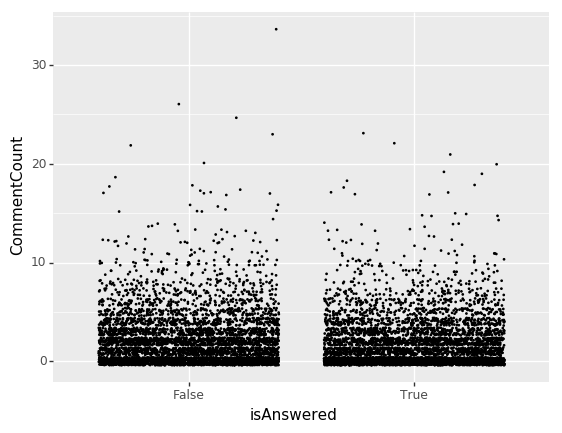

<ggplot: (8772649289157)>
bounty


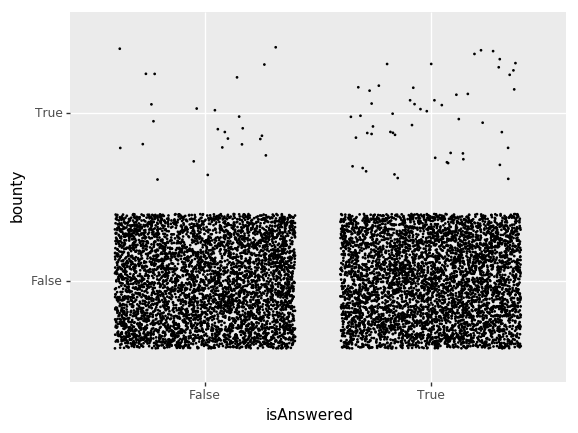

<ggplot: (8772649329721)>
Reputation


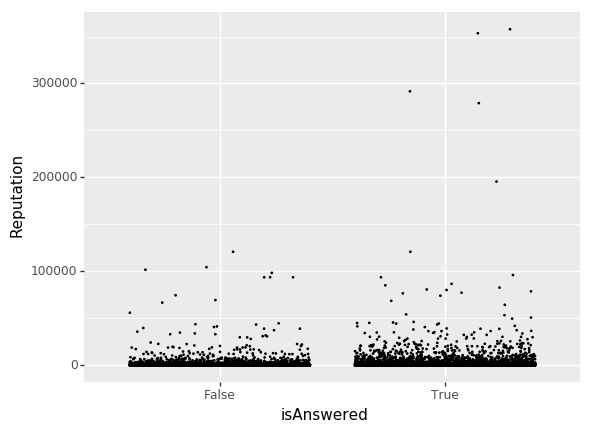

<ggplot: (-9223363264205442009)>
Views


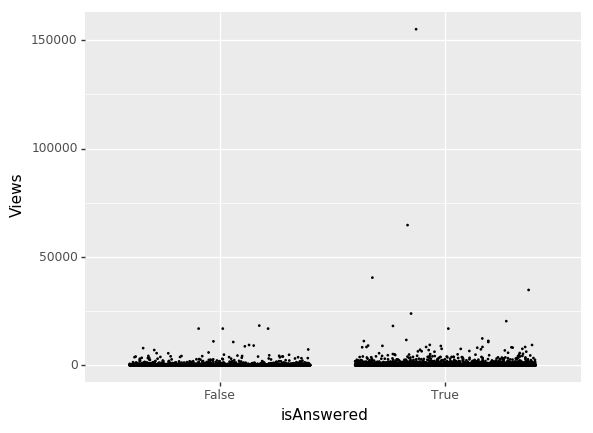

<ggplot: (-9223363264205481689)>
UpVotes


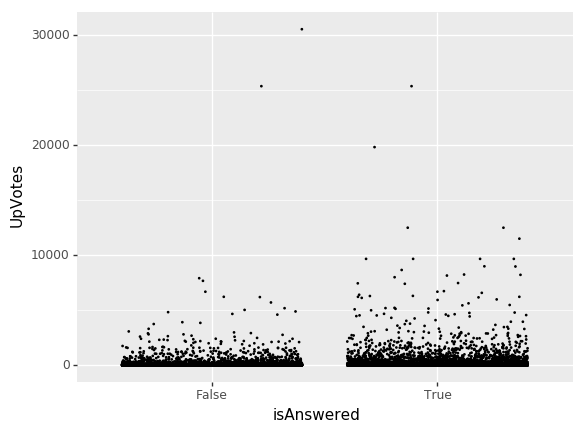

<ggplot: (-9223363264205483071)>
DownVotes


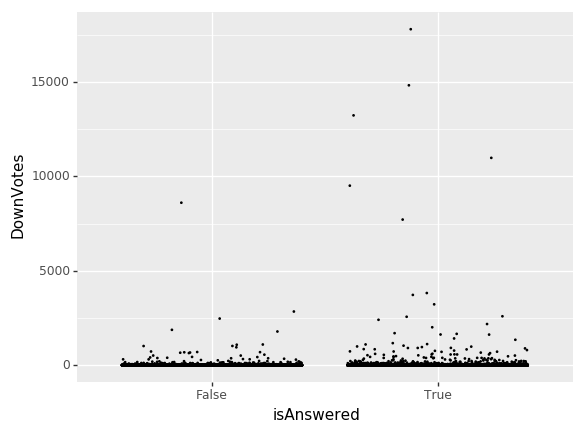

<ggplot: (8772648913167)>
BadgesCount


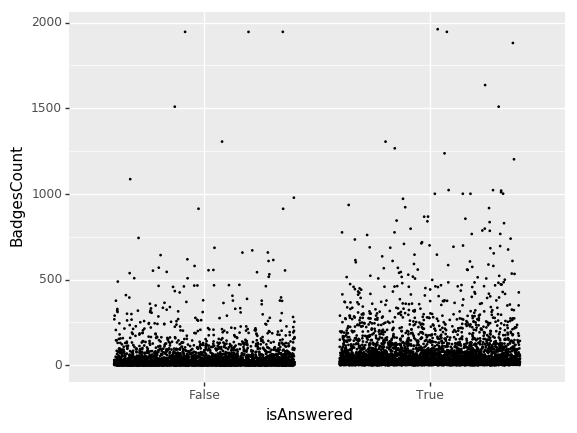

<ggplot: (8772649294333)>
tagsAggregate


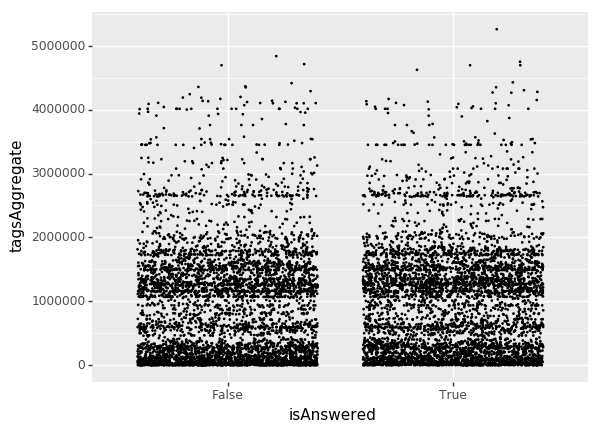

<ggplot: (-9223363264205274764)>


In [33]:
temp_ii = ignored.sample(n=10000)
for column in ignored:
    if column != "isAnswered":
        print(column)
        plot = ggplot(temp_ii, aes(x="isAnswered", y=column))
        plot += geom_jitter(size=0.1)
        print(plot)

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 764 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


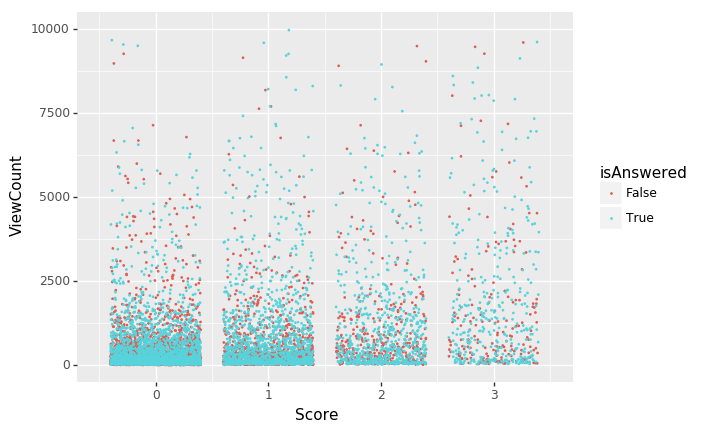

<ggplot: (8772648927538)>

In [34]:
plot = ggplot(temp_ii, aes(x="Score", y="ViewCount", color="isAnswered"))
plot += xlim(-0.5,Score_treshold - 0.5)
plot += ylim(0,10000)
plot += geom_jitter(size=0.1)
plot

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 756 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


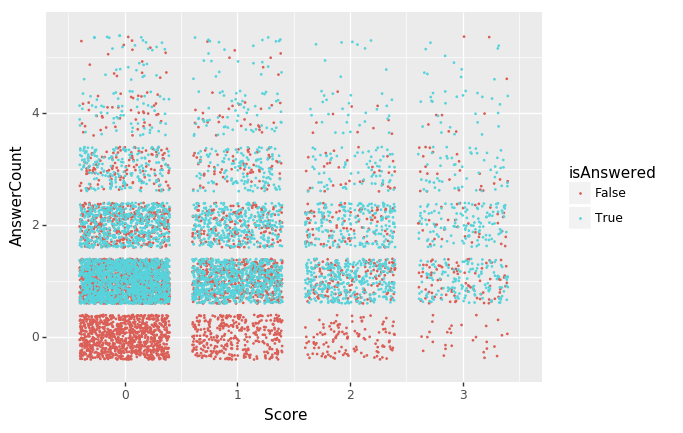

<ggplot: (8772648398056)>

In [35]:
plot = ggplot(temp_ii, aes(x="Score", y="AnswerCount", color="isAnswered"))
plot += xlim(-0.5,Score_treshold - 0.5)
plot += ylim(-0.5,5.5)
plot += geom_jitter(size=0.1)
plot

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 299 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


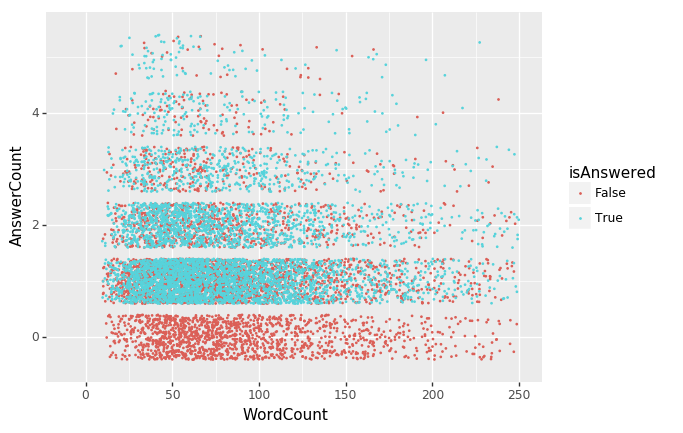

<ggplot: (-9223363264205848288)>

In [36]:
plot = ggplot(temp_ii, aes(x="WordCount", y="AnswerCount", color="isAnswered"))
plot += xlim(-10, 250)
plot += ylim(-0.5,5.5)
plot += geom_jitter(size=0.1)
plot

# Not ignored posts
Finally, we analyze the posts which are marked as 'not ignored', i.e. posts that have gotten more attention than usual, and which have more relevance to our study compared to the others.
For now, the primary feature used to classify the posts is the 'Score'.

In [37]:
# remove ignored posts
notignored = df.loc[df["Score"]>=Score_treshold]
#df = df.loc[df["ViewCount"]>=50]

In [38]:
notignored.describe()

Score     ViewCount     WordCount    LinksCount   BlocksCount  \
count  1.669654e+06  1.669654e+06  1.669654e+06  1.669654e+06  1.669654e+06   
mean   1.455991e+01  1.378221e+04  9.605860e+01  3.754263e-01  2.073307e+00   
std    8.072051e+01  4.276794e+04  7.621683e+01  8.459177e-01  2.163332e+00   
min    4.000000e+00  1.600000e+01  1.000000e+01  0.000000e+00  0.000000e+00   
25%    4.000000e+00  1.109000e+03  4.800000e+01  0.000000e+00  0.000000e+00   
50%    6.000000e+00  3.719000e+03  7.600000e+01  0.000000e+00  1.000000e+00   
75%    1.100000e+01  1.137800e+04  1.200000e+02  0.000000e+00  3.000000e+00   
max    2.225200e+04  3.913031e+06  3.872000e+03  9.000000e+00  9.000000e+00   

       TitleWordsCount   AnswerCount  CommentCount    Reputation  \
count     1.669654e+06  1.669654e+06  1.669654e+06  1.669654e+06   
mean      8.485578e+00  2.924275e+00  2.001336e+00  7.048273e+03   
std       3.437963e+00  2.481087e+00  2.864653e+00  2.469485e+04   
min       1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%       6.000000e+00  1.000000e+00  0.000000e+00  2.480000e+02   
50%       8.000000e+00  2.000000e+00  1.000000e+00  1.155000e+03   
75%       1.000000e+01  4.000000e+00  3.000000e+00  4.768000e+03   
max       3.300000e+01  2.400000e+01  1.030000e+02  1.070456e+06   

              Views       UpVotes     DownVotes   BadgesCount  tagsAggregate  
count  1.669654e+06  1.669654e+06  1.669654e+06  1.669654e+06   1.669654e+06  
mean   9.178968e+02  5.474635e+02  6.637568e+01  1.117456e+02   8.687999e+05  
std    8.353898e+03  1.391594e+03  6.885191e+02  2.103897e+02   7.594112e+05  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
25%    4.000000e+01  1.600000e+01  0.000000e+00  1.700000e+01   1.520605e+05  
50%    1.650000e+02  1.120000e+02  3.000000e+00  4.700000e+01   7.314060e+05  
75%    5.950000e+02  4.960000e+02  1.700000e+01  1.200000e+02   1.364159e+06  
max    1.723431e+06  9.054900e+04  6.550000e+04  1.689900e+04   6.121273e+06

In [39]:
notignored.corr()

Score  ViewCount  WordCount  LinksCount  BlocksCount  \
Score            1.000000   0.459085  -0.024696   -0.004139    -0.005053   
ViewCount        0.459085   1.000000  -0.083956   -0.040987    -0.021554   
WordCount       -0.024696  -0.083956   1.000000    0.264101     0.157942   
LinksCount      -0.004139  -0.040987   0.264101    1.000000     0.067952   
BlocksCount     -0.005053  -0.021554   0.157942    0.067952     1.000000   
TitleWordsCount  0.002382  -0.010765   0.088618    0.026894     0.010003   
AnswerCount      0.216059   0.418005  -0.052073   -0.058209    -0.079694   
CommentCount     0.032215   0.002209   0.139774    0.076292     0.118221   
bounty           0.007351  -0.053481   0.140965    0.135116     0.069515   
Reputation       0.067513   0.029074   0.021474    0.050145     0.048666   
Views            0.030716   0.010615   0.015421    0.027796     0.021647   
UpVotes          0.041050   0.007089   0.014493    0.080611     0.069431   
DownVotes        0.011111   0.000785   0.018460    0.032667     0.036392   
BadgesCount      0.049401   0.052904  -0.024960    0.036355     0.025713   
tagsAggregate    0.007381   0.042528   0.007191    0.018211     0.066019   
isAnswered       0.033738   0.066798  -0.065230   -0.041917     0.032241   

                 TitleWordsCount  AnswerCount  CommentCount    bounty  \
Score                   0.002382     0.216059      0.032215  0.007351   
ViewCount              -0.010765     0.418005      0.002209 -0.053481   
WordCount               0.088618    -0.052073      0.139774  0.140965   
LinksCount              0.026894    -0.058209      0.076292  0.135116   
BlocksCount             0.010003    -0.079694      0.118221  0.069515   
TitleWordsCount         1.000000    -0.007774      0.012184  0.028142   
AnswerCount            -0.007774     1.000000      0.060209 -0.024656   
CommentCount            0.012184     0.060209      1.000000  0.147442   
bounty                  0.028142    -0.024656      0.147442  1.000000   
Reputation              0.015672     0.070413      0.020846  0.007642   
Views                   0.010703     0.026276      0.019316  0.008428   
UpVotes                 0.027438     0.044099      0.028888  0.026451   
DownVotes               0.002922     0.008063      0.026149  0.017570   
BadgesCount             0.021959     0.099666      0.000604  0.018582   
tagsAggregate          -0.008994     0.067653      0.100935  0.020050   
isAnswered             -0.008896     0.102258     -0.079932 -0.121178   

                 Reputation     Views   UpVotes  DownVotes  BadgesCount  \
Score              0.067513  0.030716  0.041050   0.011111     0.049401   
ViewCount          0.029074  0.010615  0.007089   0.000785     0.052904   
WordCount          0.021474  0.015421  0.014493   0.018460    -0.024960   
LinksCount         0.050145  0.027796  0.080611   0.032667     0.036355   
BlocksCount        0.048666  0.021647  0.069431   0.036392     0.025713   
TitleWordsCount    0.015672  0.010703  0.027438   0.002922     0.021959   
AnswerCount        0.070413  0.026276  0.044099   0.008063     0.099666   
CommentCount       0.020846  0.019316  0.028888   0.026149     0.000604   
bounty             0.007642  0.008428  0.026451   0.017570     0.018582   
Reputation         1.000000  0.542852  0.571563   0.362275     0.737607   
Views              0.542852  1.000000  0.277980   0.267677     0.579406   
UpVotes            0.571563  0.277980  1.000000   0.291766     0.551297   
DownVotes          0.362275  0.267677  0.291766   1.000000     0.220863   
BadgesCount        0.737607  0.579406  0.551297   0.220863     1.000000   
tagsAggregate     -0.007038 -0.000448 -0.008151   0.000937     0.009684   
isAnswered         0.070639  0.026771  0.105065   0.024939     0.111396   

                 tagsAggregate  isAnswered  
Score                 0.007381    0.033738  
ViewCount             0.042528    0.066798  
WordCount             0.007191   -0.065230  
LinksCount            0.01821

In [40]:
# how many ignored posts has 0 answers (proportion)
sum(notignored["AnswerCount"]==0)/notignored.shape[0]

0.02364861222744353

In [41]:
sum(notignored["AnswerCount"]==0)

39485

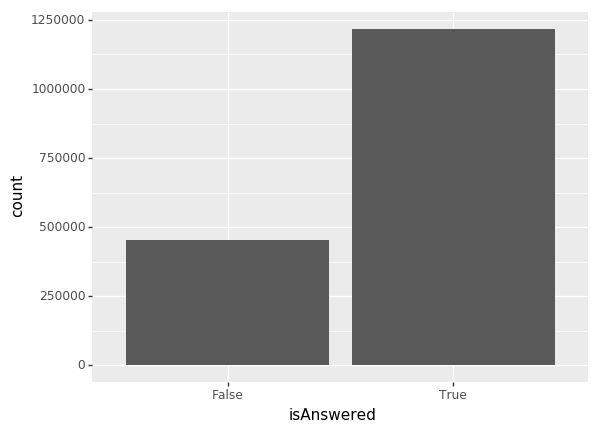

<ggplot: (8772649616560)>

In [42]:
#do not re-run this
plot = ggplot(notignored, aes(x="isAnswered"))
plot += geom_bar()
plot

In [43]:
# proportion answered to not answered
sum(notignored["isAnswered"]==1)/sum(notignored["isAnswered"]==0)

2.6842983267171396

In [44]:
# proportion of is Answered and number of answers = 0 to total is answered = 0
sum((notignored.loc[notignored["AnswerCount"]==0])["isAnswered"]==0)/sum(notignored["isAnswered"]==0)

0.08712412921106577

In [57]:
# proportion of answered in total
sum(notignored["isAnswered"])/notignored.count()["isAnswered"]

0.7285778969774576

Right of the bat, we see a significant change with the ratio of answered questions.

### The following block shows the relations between the features of the dataset with the factor of being answered or not.

Score


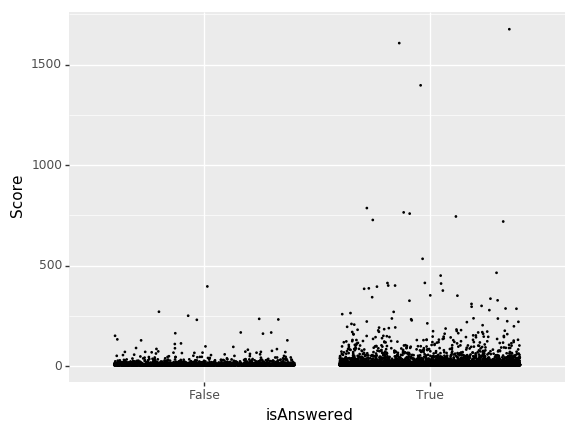

<ggplot: (-9223363264205159932)>
ViewCount


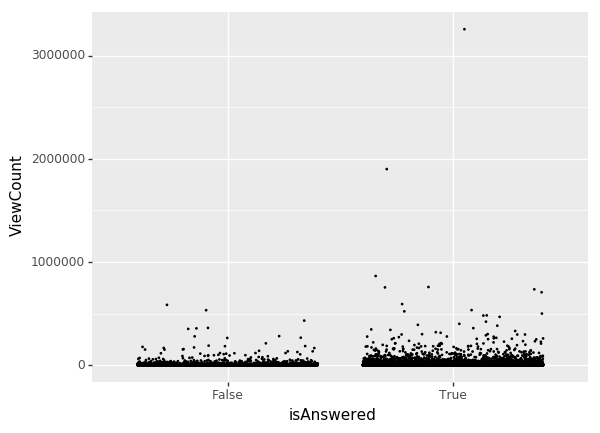

<ggplot: (8772450370238)>
WordCount


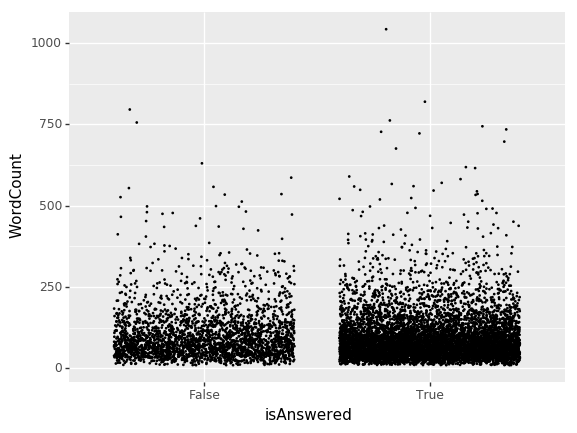

<ggplot: (-9223363264205159925)>
LinksCount


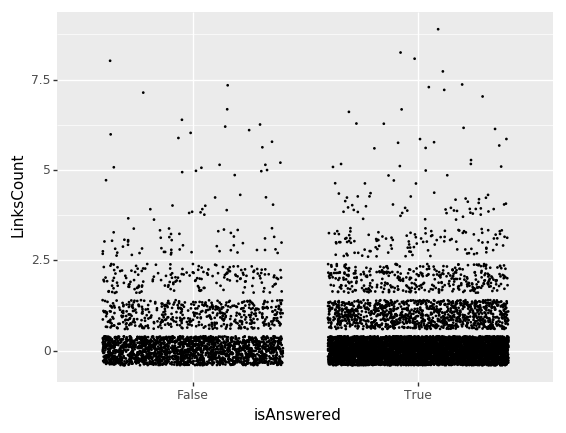

<ggplot: (8772649616062)>
BlocksCount


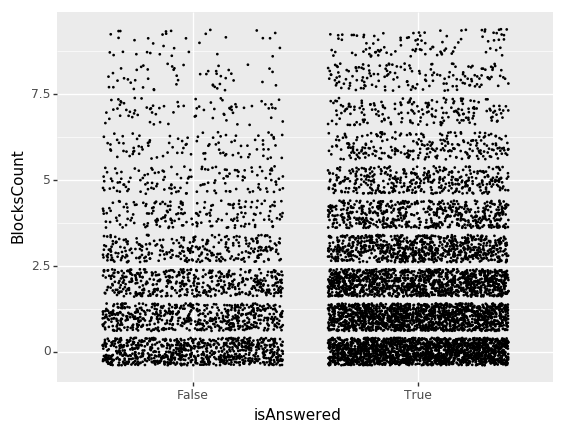

<ggplot: (8772649615757)>
TitleWordsCount


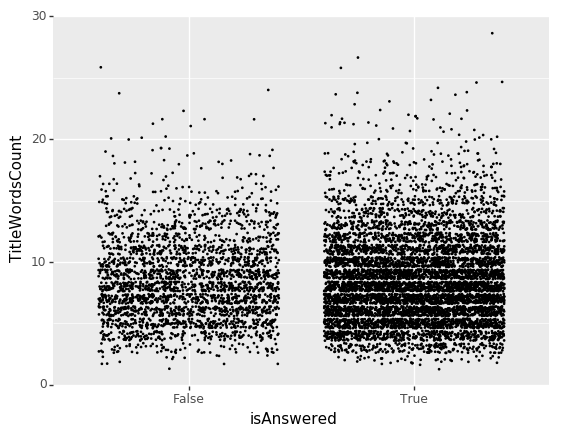

<ggplot: (8772672360070)>
AnswerCount


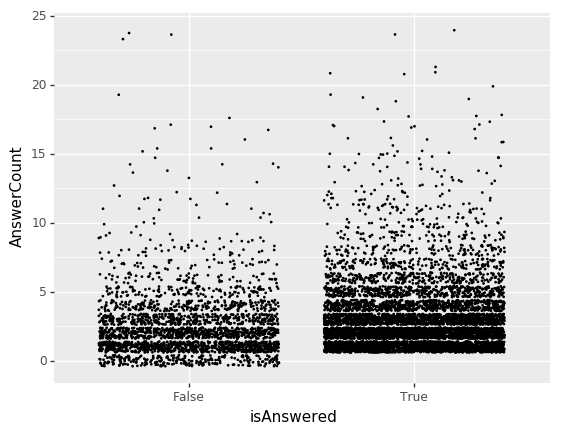

<ggplot: (8772649332046)>
CommentCount


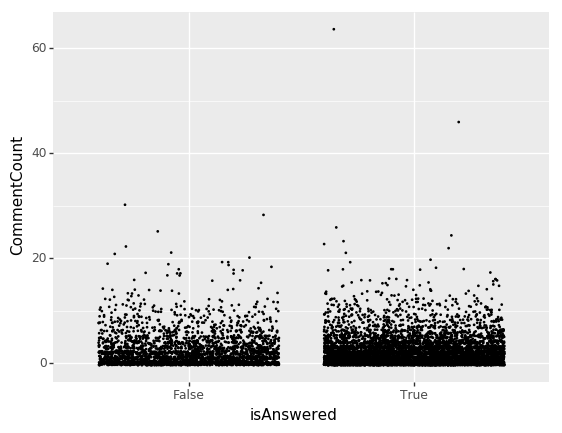

<ggplot: (8772649517646)>
bounty


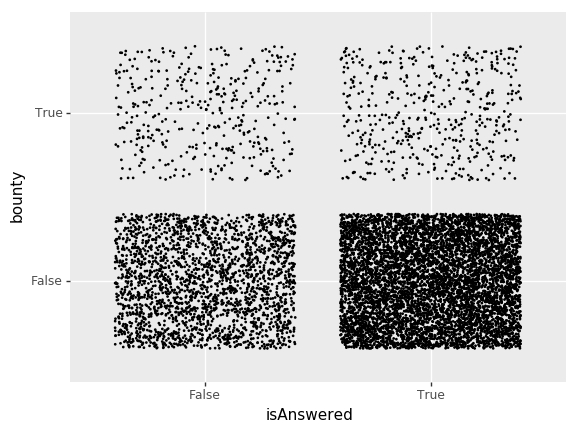

<ggplot: (-9223363264182550261)>
Reputation


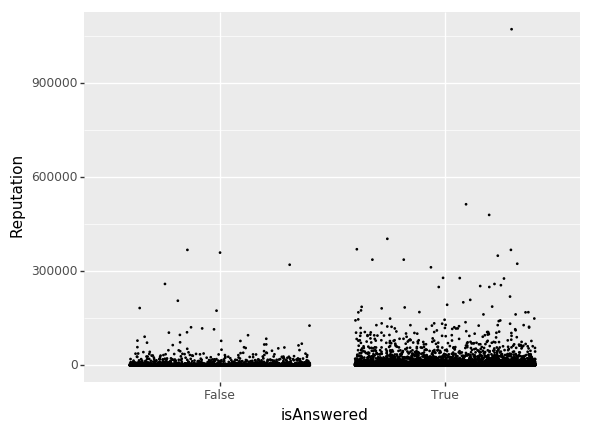

<ggplot: (8772649295585)>
Views


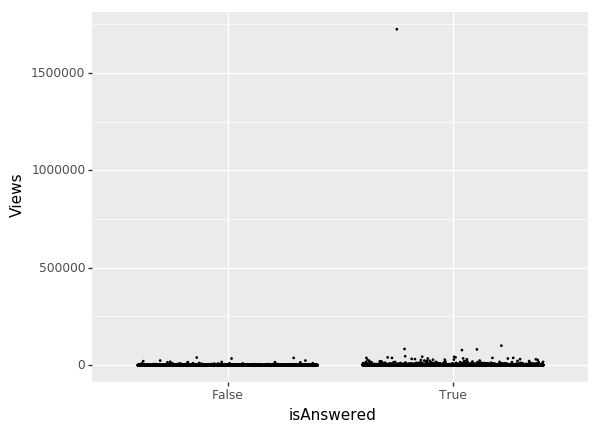

<ggplot: (8772649505656)>
UpVotes


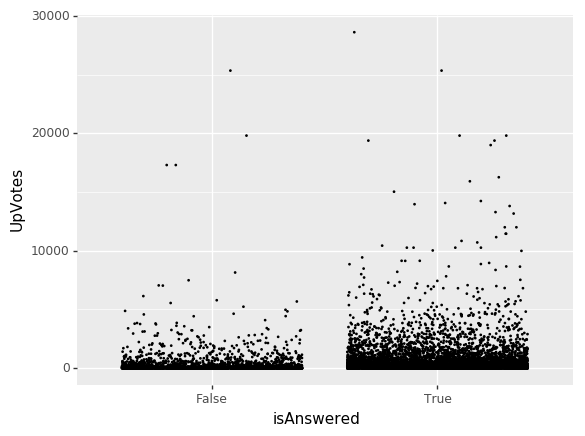

<ggplot: (-9223363264205660202)>
DownVotes


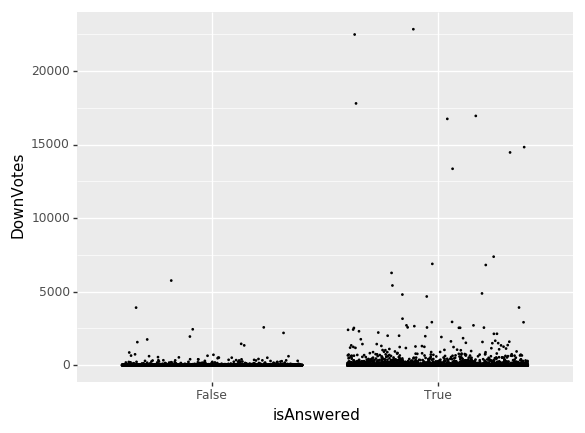

<ggplot: (-9223363264205907340)>
BadgesCount


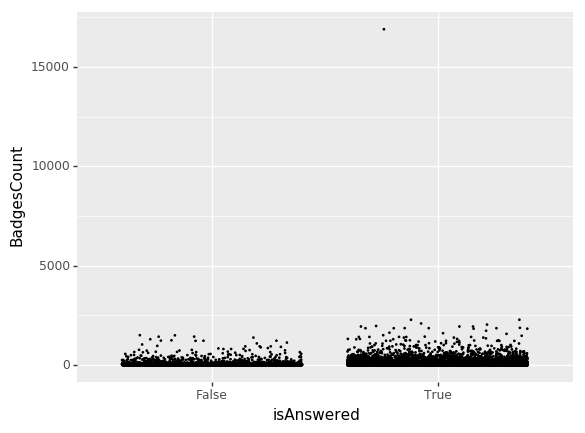

<ggplot: (8772648184005)>
tagsAggregate


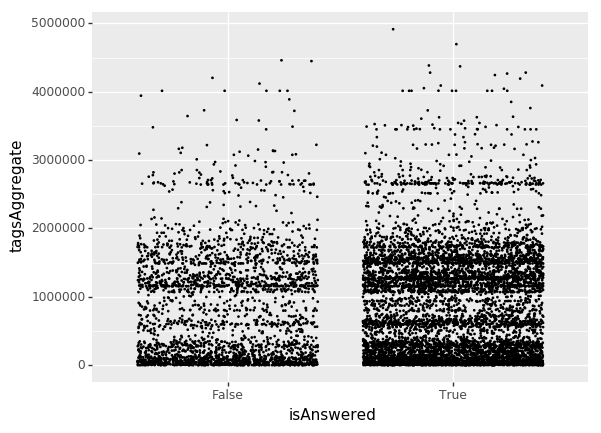

<ggplot: (-9223363264148985968)>


In [45]:
temp_ni = notignored.sample(n=10000)
for column in notignored:
    if column != "isAnswered":
        print(column)
        plot = ggplot(temp_ni, aes(x="isAnswered", y=column))
        plot += geom_jitter(size=0.1)
        print(plot)

#### From the previous plots, there a several conclusions we can make:
1. There could be a slight advantage that posts with higher score values might have over those with lower in terms of having an accepted answer, since there are barely any posts without answer that have a score above 250.
2. Taking into consideration the answered/not answered ratio with the plot we have above, we can assume that the word count does not have a significant role in the probability of getting an accepted answer.
3. From the plot representing the blocks of code present in the question, we can notice that this feature might be important to our findings. Even though there certainly is an average that is similar for both posts with accepted and not accepted answer, the posts that had more blocks of code tend to have accepted answers.
4. Maybe the most suprising finding, is that bounties play almost no role. Most of the answers do not have bounties, but there is no difference between those posts that have and does that do not.
5. User reputation as well as badges do play a role here, which is logical. Users tend to appreciate more posts from legitimate, experienced and known users, and thus try harder to answer those.
6. While downvotes show pretty bland information, upvotes seem to be a strong factor, as we see a lot of the posts with accepted answers tend to rank higher in upvote count.

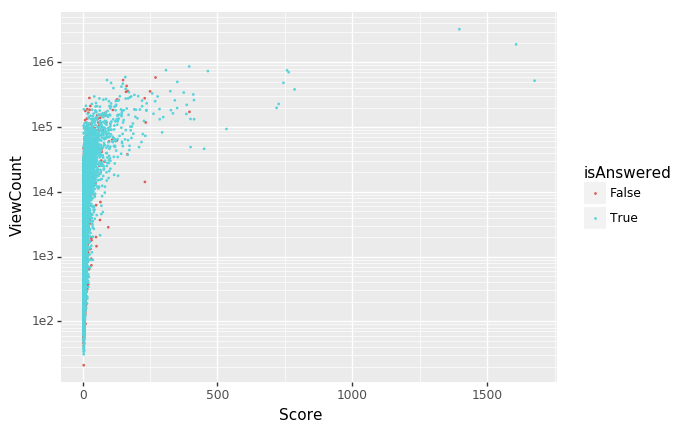

<ggplot: (8772440309880)>

In [46]:
plot = ggplot(temp_ni, aes(x="Score", y="ViewCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot += scale_y_log10()
plot

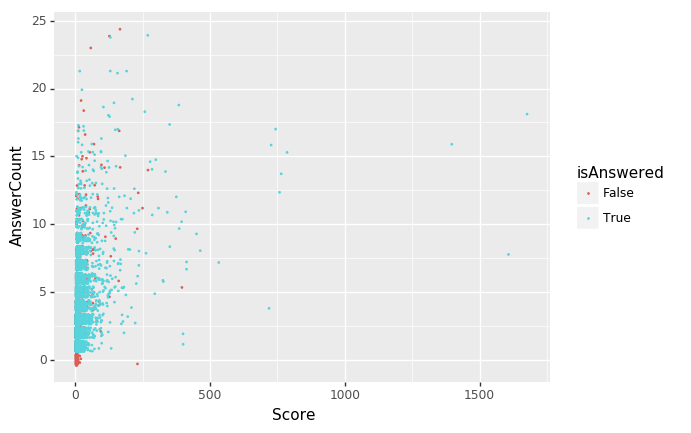

<ggplot: (-9223363264205207685)>

In [47]:
plot = ggplot(temp_ni, aes(x="Score", y="AnswerCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot

As a minor connection, in the last two plots we can see that score does increase with view count, which is logical. But the actual ratio between view count and score does seem to around 50-100.
From the second plot we can notice the distribution of the number of answers per post does tend to stick most heavily at around 3-10.

## Applying machine learning to dataset
For the last part of the study, we want to train a model that would be used to predict the chance for a post to have an accepted answer.

As relevant parameters we will consider all the columns which seemed to have at least some correlation with the accepted column.

Such are :
- upvotes 
- answers count
- OP badges
- OP reputation
- view count

In [64]:
# refining datasets for ML
# REUSABLE FUNCTIONS BLOCK

# dropping all columns with almost not correlation
def dropColumns(df):
    
    df = df.drop(columns=['tagsAggregate','Score','WordCount','BlocksCount',
                          'LinksCount','TitleWordsCount', 'CommentCount','bounty','DownVotes','Views'])
    
    return df
    
# use this to split the data for training and testing
# 80% training - 20% testing
def splitData(df):
    nrows = df.shape[0]
    thres = int(nrows * 4/5)
    
    df1 = df.iloc[:thres]
    df2 = df.iloc[thres:]
    
    return (df1,df2)

def separateAcceptedColumn(df):
    return (df['isAnswered'], df.drop(columns='isAnswered'))


# models below
from sklearn.svm import LinearSVC

def M1(features, target):
    
    model = LinearSVC(random_state=0, max_iter=10000)
    
    model.fit(features,target)
    
    return model

In [54]:
# one-line ML function
def ml_procedure(df):
    # data reconfig
    isAnsweredColumn,df_cleaned  = separateAcceptedColumn(dropColumns(df.copy()))
    
    # get the training and testing data
    df_data_training, df_data_testing = splitData(df_cleaned)
    answered_data_training, answered_data_testing = splitData(isAnsweredColumn)
    
    m1 = M1(df_data_training, answered_data_training)
    
    print("SCORE: {}".format(m1.score(df_data_testing, answered_data_testing)))
    return df_data_testing.assign(target=answered_data_testing, predicted=m1.predict(df_data_testing))

In [68]:
# ML with not ignored posts
sample = notignored.sample(n=10**4) # 10k sample

ml_procedure(sample)

SCORE: 0.711


/home/wojtek/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


ViewCount  AnswerCount  Reputation  UpVotes  BadgesCount  target  \
16055       42372            3      9642.0   1638.0        136.0    True   
295823      15609            3      1202.0    254.0         45.0    True   
154767        340            2       999.0     15.0         62.0    True   
3080         3027            1      1007.0    142.0         40.0    True   
417446       5916            3       608.0      8.0         25.0   False   
72514         529            1      5151.0    276.0        104.0   False   
292264       9098            7    126144.0   3861.0       1230.0    True   
302576       2759            2        51.0      0.0         11.0    True   
41228       18250            4      3375.0    699.0         97.0    True   
158445       3154            3       883.0     96.0         31.0   False   
76623        6473            1      3903.0    586.0         84.0    True   
305171       4387            3       444.0    140.0         25.0    True   
539894       1074            1      5224.0    374.0         66.0    True   
370993       8707            1        86.0      0.0         10.0   False   
201053       1851            4      3632.0     57.0        139.0   False   
435502        626            2       133.0     81.0         11.0    True   
214582       2034            6       370.0     28.0         20.0   False   
97588        1751            1        59.0      3.0         11.0    True   
501134       2612            2       325.0      2.0         13.0    True   
46874         262            1      1288.0    495.0         62.0    True   
191679       5553            1     42632.0   1091.0        546.0    True   
361698      15654            2        33.0      0.0          7.0    True   
73510        6225            2       686.0     97.0         26.0    True   
115078        539            1        38.0      6.0          4.0    True   
540757       3073            2      5326.0    667.0         61.0    True   
71010        1629           14      3108.0   1597.0        406.0    True   
192181      11001            3        33.0      0.0          5.0    True   
219861       1099            2       374.0     11.0         26.0   False   
292078       2702            3       479.0    132.0         29.0   False   
484864       8952            1      1469.0    901.0         36.0    True   
...           ...          ...         ...      ...          ...     ...   
516908        919            1       140.0     71.0         10.0    True   
520240       2117            1      8625.0    693.0        104.0    True   
4503         7470            4       916.0     16.0         53.0   False   
294746        450            4       857.0    359.0         33.0    True   
3898         6814            6      3713.0    134.0         87.0    True   
203468       4443            4      7028.0    636.0        217.0    True   
399334      31841            5       136.0      7.0         20.0    True   
407511       1477            2       560.0    703.0         55.0   False   
237287        595            1      4155.0    546.0        118.0   False   
197420      78587            9     20031.0    178.0        160.0    True   
118506        147            3      5440.0    209.0         73.0   False   
546864         34            2       502.0     26.0         17.0   False   
242443      66729            7      3844.0    293.0        240.0    True   
473055      93717            4      1291.0     50.0         51.0   False   
298289         69            2      1297.0   1821.0         57.0    True   
111199       8015            4      5273.0    379.0        121.0    True   
418371       5820            2      1308.0    196.0         89.0    True   
453153       1127            3      5400.0    481.0         66.0    True   
65933        2859            5      4940.0    909.0         85.0   False   
339423       9691            2      7107.0    534.0        155.0    True   
365493      18665            1        58.0      0.0     

In [66]:
# ML with sample of entire dataset
sample = df.sample(n=10**4) # 10k sample

ml_procedure(sample)

SCORE: 0.632


/home/wojtek/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


ViewCount  AnswerCount  Reputation  UpVotes  BadgesCount  target  \
569550         68            0      1461.0    445.0         40.0   False   
72247         111            2        21.0      1.0          3.0   False   
144930        156            1        28.0      7.0          3.0    True   
223713        556            0         1.0      0.0          0.0   False   
76527          24            1      6358.0   1031.0         72.0   False   
379607        856            2      4294.0    852.0         67.0   False   
176197        528            3       168.0      0.0         13.0    True   
386586         94            3       770.0     97.0         29.0   False   
384591        137            1      2708.0    995.0         59.0   False   
251113         82            0       297.0    417.0         22.0   False   
11535         179            1      1231.0    242.0         87.0   False   
42859         216            1       101.0      1.0          7.0    True   
93431          89            0        23.0      5.0          8.0   False   
246319         97            1     11285.0    987.0         81.0    True   
68330        4141            4         1.0      0.0          3.0   False   
127533       1094            2        16.0      0.0          2.0   False   
3372          468            2         0.0      0.0          0.0    True   
551193       1514            1      6166.0     51.0        264.0    True   
405420        109            1        91.0     47.0         12.0    True   
38451          17            0         4.0      0.0          0.0   False   
202341        116            1         9.0      0.0          0.0   False   
195176         19            0         1.0      0.0          1.0   False   
275915        118            3       425.0     64.0         17.0    True   
316268        105            1        92.0    322.0          7.0    True   
306201         91            0     42366.0   1018.0        174.0   False   
309122        374            1      5093.0    279.0         98.0    True   
615615         52            2      4837.0   2261.0         99.0   False   
107482        113            0        58.0     14.0         14.0   False   
372762       2213            2       178.0      1.0         13.0   False   
69261         469            2       988.0     63.0         74.0   False   
...           ...          ...         ...      ...          ...     ...   
117374      23657            1      3893.0    300.0        139.0    True   
257524         50            1        51.0      5.0         12.0   False   
221351        490            1         6.0      0.0          1.0   False   
306598        289            1        21.0      2.0          8.0   False   
367289        264            0       904.0    186.0         61.0   False   
193408        157            2        10.0      0.0          5.0   False   
417205        149            1       664.0     16.0         34.0   False   
18405         379            1         6.0      0.0          9.0   False   
141645       3141            1       506.0     22.0         22.0   False   
262859        241            1       490.0      1.0         19.0    True   
544330        299            1     19865.0    437.0        454.0    True   
425836       1227            1       987.0     31.0         39.0    True   
484982         54            1        59.0     13.0          7.0    True   
8111          927            1      1486.0    205.0         62.0    True   
174038       1564            4       100.0      8.0         14.0   False   
573164        109            1       472.0     15.0         33.0   False   
502154        189            0       155.0    848.0         14.0   False   
469919        135            0       402.0     30.0         29.0   False   
70198         289            1       546.0    145.0         15.0   False   
530150        118            6       312.0     27.0         28.0   False   
56174          27            0      1137.0    182.0     

# Study conclusions



## Post-analysis disclaimer
As much effort as we have put into pre-processing, analysing and graphically presenting our findings, there is still potential for improvement of the results that can be gathered from this data.

For one, the human factor is very hard to quantify, and it has a huge impact on the actual content of the posts that are written. Thus, in order to get even more accurate results on this investigation, some kind of a text processor needs to be applied to the contents of the questions, so that an qualitative evaluation can also be done. This might be a bit too advanced at this point.

Another factor which might not immediately jump out, is luck. As we can see from the plots of the ignored data, there are not many differences in terms of presentation features such as words count, title length, blocks of code etc. It might simply mean that, sometimes, you need a little luck for your post to start to get more popular and more visible.

Thus, this investigation proved to be a difficult and extensive one, yet still only yielding moderately satisfactionary results.


